<a href="https://colab.research.google.com/github/Fatma-Laidani/pimaindians-diabetes-data/blob/main/pimaindians_diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1)Import Librery

In [19]:
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# 2)Reading Dataset

In [2]:
df= pd.read_csv('/content/drive/MyDrive/mydata/pimaindians-diabetes.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


we see Binary classification Dataset

# 3)Data preprocessing

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

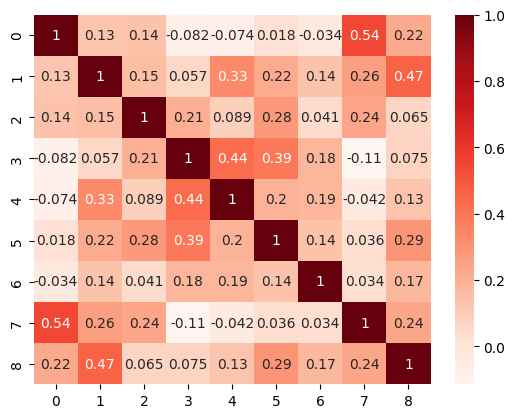

In [5]:
sns.heatmap(df.corr(),cmap='Reds',annot=True)

Test Nulls values

In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

# 4)Building Models

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df1 = scaler.fit_transform(df)
# df1=pd.DataFrame(df1)
# df1

In [10]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [11]:
X=df.drop([8],axis=1)
X.head()

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y=df[8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: 8, dtype: int64

In [13]:
ModelScoreData={}
ModelScoreData

{}

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

file_name = 'pimaindians-diabetes-data.txt'
with open(file_name, 'a') as f:
    f.write("\n \t\t\t Report for Dataset pimaindians-diabetes")
    f.write('\n--------------------------------------------------')
# f.close()
for i in [0,42,44]:
  for j in [0.2,0.25,0.3]:
      random_state=i
      test_size=j

      X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=test_size, shuffle=True,random_state=random_state)

      LogisticR_Model = LogisticRegression()
      RandomForestClassifierModel = RandomForestClassifier()
      svm_Model = SVC()
      DecisionTreeClassifierModel = DecisionTreeClassifier()
      knn=KNeighborsClassifier()
      Bagging=BaggingClassifier()
      XGB = XGBClassifier()
      GradientBoosting=GradientBoostingClassifier()
      NN=MLPClassifier()
      Models = [svm_Model,RandomForestClassifierModel,LogisticR_Model,DecisionTreeClassifierModel,knn,Bagging,XGB,NN,GradientBoosting]
      for model in Models :
        print(f'for Model {str(model).split("(")[0]}')
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        train_accuracy = accuracy_score(y_test, y_pred)*100
        print('Training accuracy : %.4f %%' % train_accuracy)
        ClassificationReport = classification_report(y_test,y_pred)
        print('Classification Report is : \n', ClassificationReport )
        print('===========================================')


        ModelScoreData[str(model).split("(")[0]]=[train_accuracy,ClassificationReport.split()[19],ClassificationReport.split()[20],ClassificationReport.split()[21]]

      ModelScoreData
      dff = pd.DataFrame(ModelScoreData, index = ['Acc', 'precision','recall','f1-score'] )
      transposed_dff = dff.transpose()
      training=int(100-test_size*100)
      print(f"Model Score with: random_state={random_state} and training={training}%\n",transposed_dff)

      # file_name = 'pimaindians-diabetes-data.txt'

      with open(file_name, 'a') as f:
          dff_string = transposed_dff.to_string(header=True)
          f.write("\n Model Score with: random_state=" + ' ' + str(random_state) +" and training=" + str(training) + "%\n")
          f.write(dff_string)
          f.write('\n--------------------------------------------------')
f.close()


for Model SVC
Training accuracy : 79.2208 %
Classification Report is : 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

for Model RandomForestClassifier
Training accuracy : 81.1688 %
Classification Report is : 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

for Model LogisticRegression
Training accuracy : 82.4675 %
Classification Report is : 
               precision    recall  f1-score   support

           0       0.84      0.92     